<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "green">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, reklama5.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>What data you will be extracting and why?</li>
- I will be extracting data from forum.femina.mk. It is a web forum, where people can discuss different topics and interact with like-minded people. I will be extracting the topics, their last modified date and number of interactions on them, because I would like to see which topics appeal most to people in my country.
<li>Add a screenshot of the web-site that you will be scraping</li>

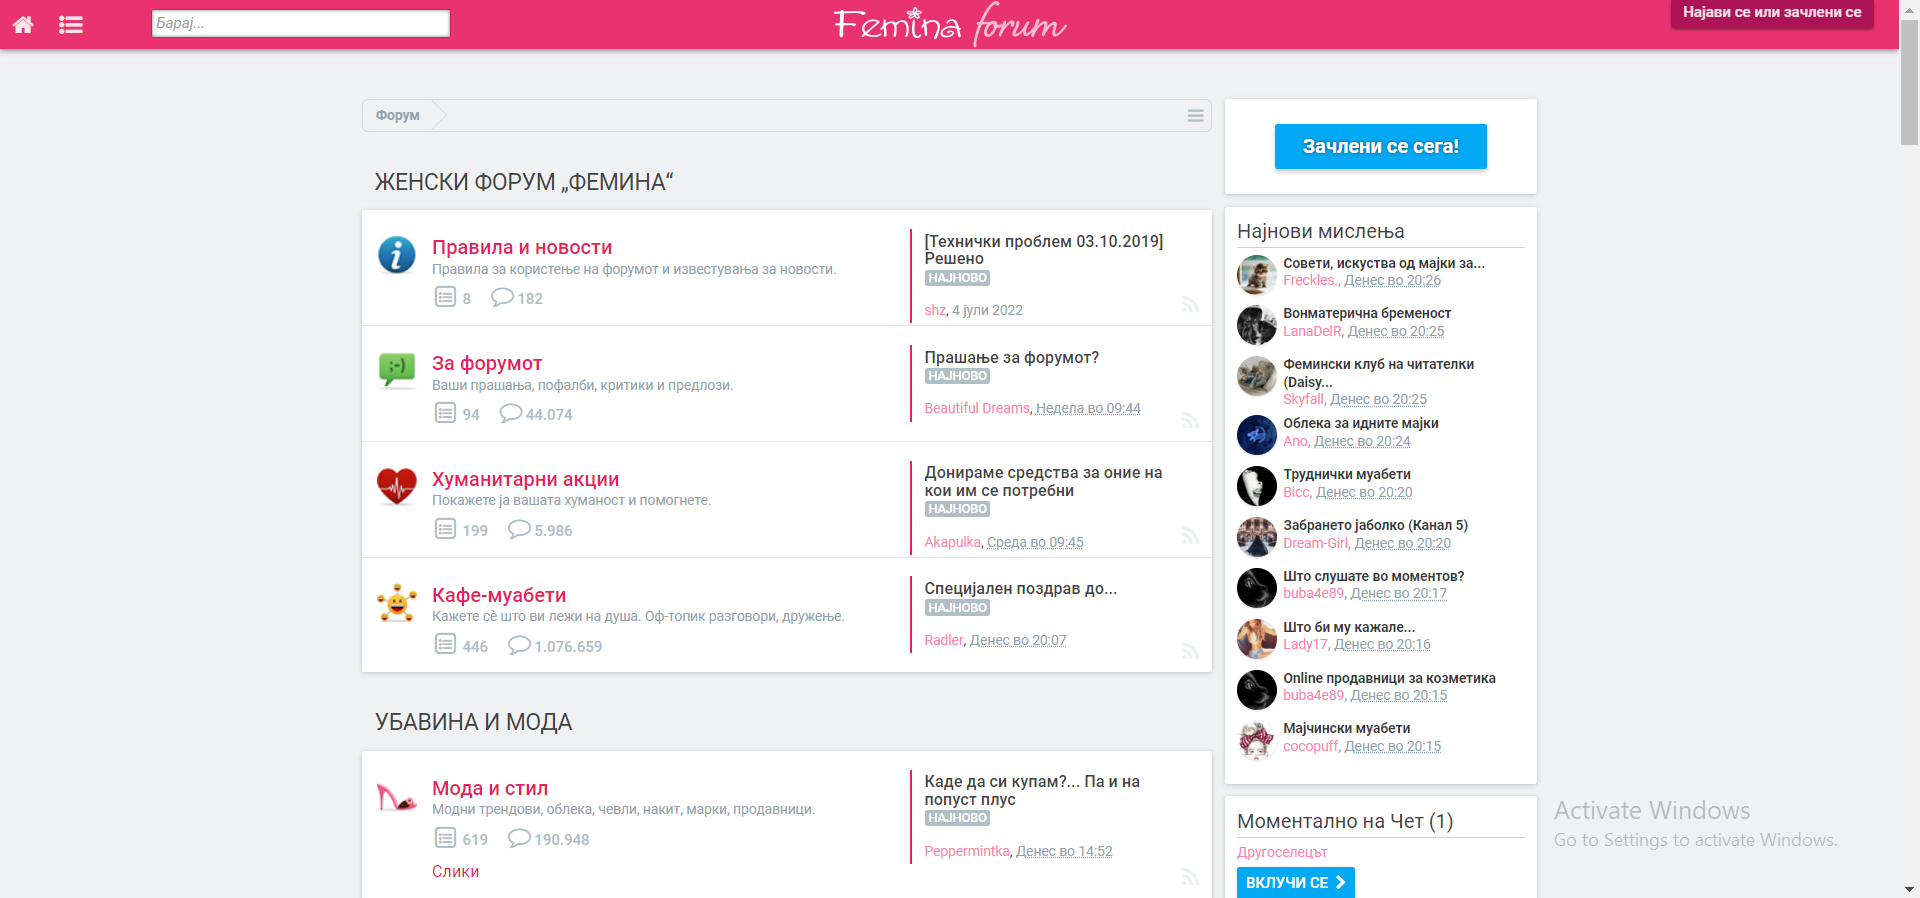


# <font color='Orange'>Requirements specified for Web Scraping</font>


Import all libraries and modules that you are going to use.

In [ ]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....

import pandas as pa
import requests
from bs4 import BeautifulSoup
from datetime import datetime 
from IPython.display import HTML

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> 

 **Fetch a website's content - send request**

In [ ]:
#add your code
snapshot_url = 'https://forum.femina.mk/'  
snapshot = requests.get(snapshot_url)

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [ ]:
#add your code
snapshot

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [ ]:
#add your code
html = snapshot.text
soup = BeautifulSoup (html, 'html.parser')

**Print the HTML code that you get**

In [80]:
#add your code
soup

<!DOCTYPE html>

<html class="Public NoJs LoggedOut Sidebar Responsive " dir="LTR" id="XenForo" lang="mk-MK" xmlns:fb="http://www.facebook.com/2008/fbml">
<head>
<meta charset="utf-8"/>
<meta content="IE=Edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<base href="https://forum.femina.mk/"/>
<script>
			var _b = document.getElementsByTagName('base')[0], _bH = "https://forum.femina.mk/";
			if (_b && _b.href != _bH) _b.href = _bH;
		</script>
<title>Фемина Форум</title>
<noscript><style>.JsOnly, .jsOnly { display: none !important; }</style></noscript>
<link href="css.php?css=xenforo,form,public&amp;style=2&amp;dir=LTR&amp;d=1658673117" rel="stylesheet"/>
<link href="css.php?css=login_bar,node_category,node_forum,node_list,panel_scroller,wf_default&amp;style=2&amp;dir=LTR&amp;d=1658673117" rel="stylesheet"/>
<script src="js/jquery/jquery-1.11.0.min.js"></script>
<script src="js/xenforo/xenforo.js?_v=0f6d5e9c"></script>
<l

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

<font color='red'> You need to extract a minimum of four features (lists/columns) from the web site (example: titles, posting time, comments, likes, ...)</font>

`add your attributes here for building the dataset`
titles, times, related_discussions, messages

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [ ]:
#add your code
#first selecting all the nodes in the forum, then their titles

nodes = []

nodes = soup.select('.forumNodeInfo')

str(nodes[0].prettify())

In [ ]:
nodeTitles = []

for i in range(0,len(nodes)):
  nodeTitles.append(nodes[i].select_one('.nodeTitle'))
nodeTitles

**Add as many codeboxes as you need for selecting all the html elements**

In [ ]:
#add your code
nodeDates = []

for i in range(0,len(nodes)):
  nodeDates.append(nodes[i].select_one('.DateTime'))
nodeDates

In [ ]:
nodeDiscussions = []

for i in range(0,len(nodes)):
  nodeDiscussions.append(nodes[i].select_one('.nodeStats'))

nodeDiscussions


In [ ]:
nodeMessages = []

for i in range(0,len(nodes)):
  nodeMessages.append(nodes[i].select_one('.nodeStats'))

len(nodeMessages)

38

**Create lists with the extracted data from the html elements that you selected**

In [ ]:
#add your code
titles = []

for i in range(0,len(nodeTitles)):
  titles.append(nodeTitles[i].text)

dateTimes = []

for i in range(0,len(nodeDates)):
  dateTimes.append(nodeDates[i].text)

related_discussions = []

for i in range(0,len(nodeDiscussions)):
  related_discussions.append(nodeDiscussions[i].select_one('dd').text)

messages = []

for i in range(0,len(nodeMessages)):
  messages.append(nodeMessages[i].select('dd')[1].text)

**Print all lists that are containing the elements**

In [ ]:
#add your code
print(titles)
print(dateTimes)
print(related_discussions)
print(messages)

['Правила и новости', 'За форумот', 'Хуманитарни акции', 'Кафе-муабети', 'Мода и стил', 'Лице', 'Тело', 'Коса', 'Врски', 'Сингл', 'Секс', 'Бременост', 'Бебе', 'Дете', 'Брак', 'Свадба', 'Коронавирус', 'Здравствени проблеми', 'Психологија', 'Диети', 'Фитнес', 'Храна и пијалоци', 'Рецепти', 'Барање работа', 'На работното место', 'Општи дискусии', 'Слободно време', 'Дом', 'Образование', 'Литература и уметност', 'Религија', 'Политика и настани', 'Форумски игри', 'Насмевка', '„Другата“ наука', 'Музика', 'Филм и ТВ', 'Канта']
['4 јули 2022', '30 октомври 2022 во 09:44', '26 октомври 2022 во 09:45', '1 ноември 2022 во 20:31', '1 ноември 2022 во 14:52', '1 ноември 2022 во 20:34', '1 ноември 2022 во 18:46', '1 ноември 2022 во 17:38', '1 ноември 2022 во 20:35', '1 ноември 2022 во 15:03', '1 ноември 2022 во 18:05', '1 ноември 2022 во 20:35', '1 ноември 2022 во 20:26', '1 ноември 2022 во 19:33', '1 ноември 2022 во 19:38', '1 ноември 2022 во 15:04', '27 октомври 2022 во 21:04', '1 ноември 2022 во 20

**Check if all lists are the same size**

In [ ]:
#add your code
len(titles) == len(dateTimes) == len(related_discussions) == len(messages)

True

# <font color='Orange'>Create a Pandas DataFrame</font> 


**Create the DataFrame from the lists you get and name your *Columns***

In [ ]:
#add your code

matrix = []
for i in range(0, len(nodes)):
    node = {}
    node['Title'] = titles[i]
    node['DateTime'] = dateTimes[i]
    node['Number of discussions'] = related_discussions[i]
    node['Number of messages'] = messages[i]
    matrix.append(node)

df = pa.DataFrame(matrix)

**Print the dataset you obtain**

In [ ]:
#add your code
df

,Title,DateTime,Number of discussions,Number of messages
0,Правила и новости,4 јули 2022,8,182
1,За форумот,30 октомври 2022 во 09:44,94,44.074
2,Хуманитарни акции,26 октомври 2022 во 09:45,199,5.986
3,Кафе-муабети,1 ноември 2022 во 20:31,446,1.076.660
4,Мода и стил,1 ноември 2022 во 14:52,619,190.948
5,Лице,1 ноември 2022 во 20:34,411,148.531
6,Тело,1 ноември 2022 во 18:46,362,96.750
7,Коса,1 ноември 2022 во 17:38,270,62.037
8,Врски,1 ноември 2022 во 20:35,1.077,198.025
9,Сингл,1 ноември 2022 во 15:03,230,53.418


# <font color = 'Green'>Advanced part</font>

<font color = 'orange'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font> 
For the extra task you will need to take a look of the Selenium library. Here is a quick intro to this library and what features it has.

Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.
 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/

Starting code id given below.

<font color ="red"> During the laboratory exercise, will be defined which side and what will need to be extracted using Selenium library</font>



In [ ]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results
#divs = wd.find_element(By.TAG_NAME, 'div')